In [4]:
from binance.client import Client

import ccxt
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [22]:
# pip install python-binance

from binance.client import Client

def binance_ticker(client):
    tickers = client.get_all_tickers()
    print(type(tickers), len(tickers))
    result_tickers = []
    for ticker in tickers:
        symbolLen = len(ticker['symbol'])
        if ticker['symbol'][symbolLen - 4:symbolLen] == "USDT":
#            print(f"len=[{symbolLen}], symbol=[{ticker['symbol']}], price=[{ticker['price']}]")
            result_tickers.append(ticker)
    return result_tickers

if __name__ == "__main__":
    api_key = "..."
    api_secret = "..."

    client = Client(api_key=api_key, api_secret=api_secret)

    result = binance_ticker(client)
    # for symbol, price in result:
    #     # print (type(i))
    #     print(f"{symbol} : {price}")
    
    print(len(result))

    for i in result:
        for key, value in i.items():
            # print(f"[{key}] : {value}")
            # print(type({key}))
            if {key} == {"symbol"}:
                print(f"{value}")

    print(len(result))

<class 'list'> 2876
540
BTCUSDT
ETHUSDT
BNBUSDT
BCCUSDT
NEOUSDT
LTCUSDT
QTUMUSDT
ADAUSDT
XRPUSDT
EOSUSDT
TUSDUSDT
IOTAUSDT
XLMUSDT
ONTUSDT
TRXUSDT
ETCUSDT
ICXUSDT
VENUSDT
NULSUSDT
VETUSDT
PAXUSDT
BCHABCUSDT
BCHSVUSDT
USDCUSDT
LINKUSDT
WAVESUSDT
BTTUSDT
USDSUSDT
ONGUSDT
HOTUSDT
ZILUSDT
ZRXUSDT
FETUSDT
BATUSDT
XMRUSDT
ZECUSDT
IOSTUSDT
CELRUSDT
DASHUSDT
NANOUSDT
OMGUSDT
THETAUSDT
ENJUSDT
MITHUSDT
MATICUSDT
ATOMUSDT
TFUELUSDT
ONEUSDT
FTMUSDT
ALGOUSDT
USDSBUSDT
GTOUSDT
ERDUSDT
DOGEUSDT
DUSKUSDT
ANKRUSDT
WINUSDT
COSUSDT
NPXSUSDT
COCOSUSDT
MTLUSDT
TOMOUSDT
PERLUSDT
DENTUSDT
MFTUSDT
KEYUSDT
STORMUSDT
DOCKUSDT
WANUSDT
FUNUSDT
CVCUSDT
CHZUSDT
BANDUSDT
BUSDUSDT
BEAMUSDT
XTZUSDT
RENUSDT
RVNUSDT
HCUSDT
HBARUSDT
NKNUSDT
STXUSDT
KAVAUSDT
ARPAUSDT
IOTXUSDT
RLCUSDT
MCOUSDT
CTXCUSDT
BCHUSDT
TROYUSDT
VITEUSDT
FTTUSDT
EURUSDT
OGNUSDT
DREPUSDT
BULLUSDT
BEARUSDT
ETHBULLUSDT
ETHBEARUSDT
TCTUSDT
WRXUSDT
BTSUSDT
LSKUSDT
BNTUSDT
LTOUSDT
EOSBULLUSDT
EOSBEARUSDT
XRPBULLUSDT
XRPBEARUSDT
STRATUSDT
AIONUSDT
MBLUSDT


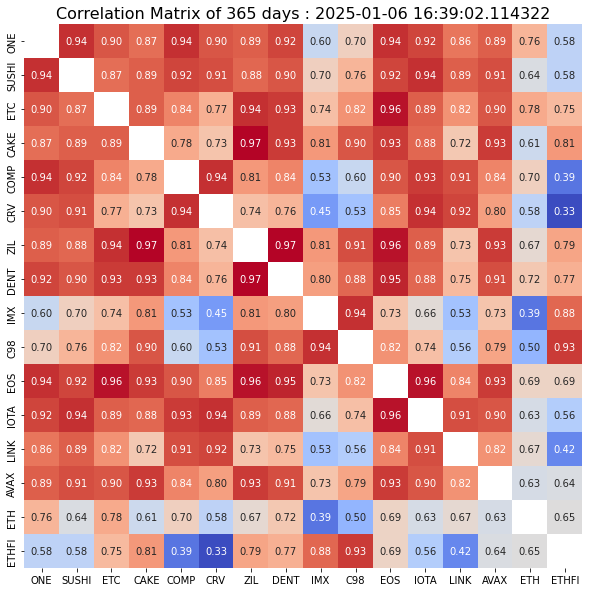

In [7]:
'''
현물
분봉/일봉 조회
fetch_ohlcv 메소드를 사용하면 특정 암호화폐의 분봉/일봉 데이터를 500개까지 얻을 수 있습니다. fetch_ohlcv 메소드는 2차원 리스트 형태로 데이터를 제공해주므로 이를 판다스의 데이터프레임으로 변환하여 사용하면 편리합니다. 바이낸스 거래소의 기준 시간은 UTC이므로 국내보다 약 9시간 느린 것을 확인할 수 있습니다.
input parameters
    symbol    : BTC/USDT ... 같은 토큰 2개의 쌍
    timeframe : 1m(분봉), 1d(일봉) ==> 기본 일봉
    limit     : 조회 건수 ==> 기본 500
'''
def binance_getch_ohlcv(symbol, timeframe='1m', limit = 365):
    binance = ccxt.binance()

    get_ohlcv = binance.fetch_ohlcv(symbol=symbol, timeframe=timeframe, limit=limit)

    df = pd.DataFrame(get_ohlcv, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])
    df['datetime'] = pd.to_datetime(df['datetime'], unit="ms")
    df.set_index('datetime', inplace=True)

    return df

'''
Function    : cctx_corr_func
Description : 각 코인의 테더 기준 정보 중 종가를 기준으로 상관관계 분석 및 시각화
Parameter   :
                target : 분석하고자 하는 타겟 리스트
                limit  : 분석하고자 하는 기준(일일 기준)
'''
def cctx_corr_func(target, limit):
    # 데이터프레임 딕셔너리 생성
    dataframes = {}
    
    # 타겟 코인 관련 정보 얻기
    for name in target:
        df = binance_getch_ohlcv(f"{name}/USDT", timeframe="1d", limit = limit)
        key = name
        dataframes[key] = df['close']

    # 상관계수 계산 및 테이블 화
    correlation_matrix = pd.DataFrame(index=dataframes.keys(), columns=dataframes.keys())

    for key1 in dataframes.keys():
        for key2 in dataframes.keys():
            if key1 == key2:
                correlation_matrix.loc[key1, key2] = np.nan  # 빈칸 처리
            else:
                corr = dataframes[key1].corr(dataframes[key2])
                correlation_matrix.loc[key1, key2] = round(corr, 2)
                
    # 히트맵 시각화
    now = datetime.datetime.now()
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
    plt.title(f'Correlation Matrix of {limit} days : {now}', fontsize=16)
    plt.show()
    
    
# target 코인(USDT 기준) 예시, 추후에도 리스트로 입력한다면 무관
# target = ['DASH','IOTA','CHZ','C98','DOT','ETC','DYDX','ARB','KSM','EGLD']
# DASHUSDT, OTA, EGLD XS 없음
# target = ['TRX','RSR','SOL','JUP','AXS','FLOW','OP','IOST','IOTA','IMX','C98','ONE','ZRX','LDO','ARB','DYDX','WOO','CHZ','C98','DOT','ETC','DYDX','ARB','KSM']
target = ['ONE','SUSHI','ETC','CAKE','COMP','CRV','ZIL','DENT','IMX','C98','EOS','IOTA','LINK','AVAX','ETH','ETHFI']

# Default 365, 필요에 따라 180(6개월), 90(3개월) 선택 가능하도록 기능
limit = 365

# target 코인 관련 정보 csv 저장
cctx_corr_func(target, limit)